# Number of days since the pop-up store opened





In [1]:
#Import the require libraries.
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
#Load the Dataset
cafe_data = pd.read_csv('/content/ci_transaction.csv')
cafe_data

,id,date,days_after_open,day_of_week,hours_after_open,drink_id,quantity,raining,study_area_id
0,0,2019-07-22,0,Mon,0,5,1,No,3
1,1,2019-07-22,0,Mon,0,5,1,No,1
2,2,2019-07-22,0,Mon,0,2,1,No,5
3,3,2019-07-22,0,Mon,0,2,1,No,6
4,4,2019-07-22,0,Mon,0,5,1,No,5
...,...,...,...,...,...,...,...,...,...
27709,27709,2019-12-22,153,Sun,5,14,2,No,3
27710,27710,2019-12-22,153,Sun,5,6,1,No,3
27711,27711,2019-12-22,153,Sun,5,12,1,No,0
27712,27712,2019-12-22,153,Sun,5,9,1,No,4


In [3]:
#Check for attribute types.
cafe_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27714 entries, 0 to 27713
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                27714 non-null  int64 
 1   date              27714 non-null  object
 2   days_after_open   27714 non-null  int64 
 3   day_of_week       27714 non-null  object
 4   hours_after_open  27714 non-null  int64 
 5   drink_id          27714 non-null  int64 
 6   quantity          27714 non-null  int64 
 7   raining           27171 non-null  object
 8   study_area_id     27714 non-null  int64 
dtypes: int64(6), object(3)
memory usage: 1.9+ MB


In [4]:
#check for null values
cafe_data.isnull().sum()
#summary of the dataset.
cafe_data.describe()
#Number of unique values raining attributes contains.
cafe_data['raining'].value_counts()

id                    0
date                  0
days_after_open       0
day_of_week           0
hours_after_open      0
drink_id              0
quantity              0
raining             543
study_area_id         0
dtype: int64

,id,days_after_open,hours_after_open,drink_id,quantity,study_area_id
count,27714.000000,27714.000000,27714.000000,27714.000000,27714.000000,27714.000000
mean,13856.500000,107.558959,2.375947,8.030165,1.266905,2.166558
std,8000.487016,36.843121,1.681598,4.875940,0.613148,2.131795
min,0.000000,0.000000,0.000000,0.000000,1.000000,-1.000000
25%,6928.250000,89.000000,1.000000,4.000000,1.000000,0.000000
50%,13856.500000,117.000000,2.000000,8.000000,1.000000,1.000000
75%,20784.750000,136.000000,4.000000,12.000000,1.000000,4.000000
max,27713.000000,153.000000,5.000000,16.000000,4.000000,6.000000


No     19768
Yes     7403
Name: raining, dtype: int64

only raining attribute is containing the null value in the dataset, which is an object type and contains only yes or no, to compute the Null value here I will use the mode method, where I will replace null with values having a maximum frequency. Here for raining attribute out of 27714 values only 7403 containing yes which is only 27 percent of the total count and no having 19768 values 73 percent of total values, so I will replace the null with No. 

In [5]:
cafe_data['raining'].fillna('No',inplace = True)

Next, as my task is to see if the days after the open attribute have any impact on hourly coffee sale data, so I will use the group by function to summarize the sales data based on the number of days since the cafe being open and hours of the day cafe been opened.

In [6]:
#Use groupby function to summarize the quantity based on both days_after_open and hours_after_open attributes.
group_data = cafe_data.groupby(['days_after_open','hours_after_open']).sum({'quantity':['sum']})
group_data = group_data.reset_index()
group_data

,days_after_open,hours_after_open,id,drink_id,quantity,study_area_id
0,0,0,55,73,11,35
1,0,1,221,77,21,45
2,0,2,159,44,8,3
3,0,3,306,72,13,23
4,0,4,120,28,4,6
...,...,...,...,...,...,...
919,153,1,1757216,543,85,146
920,153,2,1706209,479,80,139
921,153,3,1378775,396,63,38
922,153,4,1657830,522,80,139


In [7]:
#Drop the unwanted columns.
group_data2 = group_data.drop(['id','drink_id','study_area_id'],axis = 1)
group_data2

,days_after_open,hours_after_open,quantity
0,0,0,11
1,0,1,21
2,0,2,8
3,0,3,13
4,0,4,4
...,...,...,...
919,153,1,85
920,153,2,80
921,153,3,63
922,153,4,80


<Figure size 720x432 with 0 Axes>

<function matplotlib.pyplot.show>

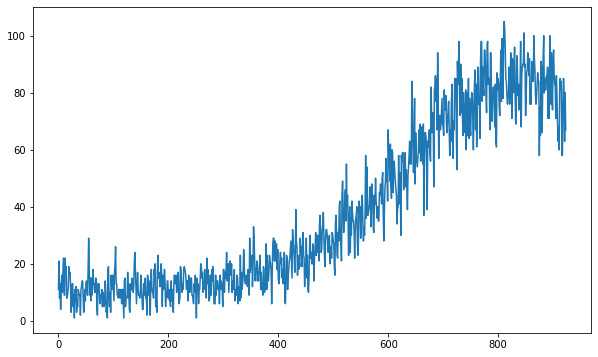

In [8]:
plt.figure(figsize=(10,6))
plt.plot(group_data2.index,group_data2.quantity)
plt.show

In [9]:
days_group = group_data2.groupby(['days_after_open']).sum({'quantity':'sum'})
days_group = days_group.drop(['hours_after_open'],axis = 1)
days_group

,quantity
days_after_open,
0,68
1,84
2,85
3,80
4,47
...,...
149,511
150,509
151,427


<Figure size 1080x432 with 0 Axes>

<function matplotlib.pyplot.show>

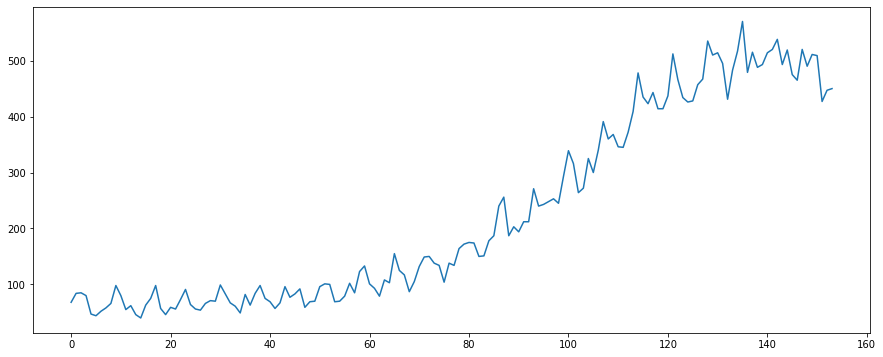

In [10]:
plt.figure(figsize=(15,6))
plt.plot(days_group.index,days_group.quantity)
plt.show

Here in this plot I can see the trend is almost stale for the first 80 days there is a sudden increase and decrease in demand but the overall trend of the sale is almost constant but after 80 days the demand increases rapidly, because in the plot the trend increases exponentially, so there is a continuous increase in the sale of the store, but in the last few days, after 140 days of the store being opened the trend of the demand going down. for better analysis, I will use some heatmaps and bar plots to see the changes in numbers. 

In [11]:
group_data2.groupby(['hours_after_open']).sum({'quantity':'sum'})

,days_after_open,quantity
hours_after_open,,
0,11781,6138
1,11781,6442
2,11781,6205
3,11781,5808
4,11781,5463
5,11781,5055


here I build a table to see is there any demand in the sale of the coffee in the particular hour of the day, so from the table I can say that the demand is high in earlier hours like in between 7 to 10 but after 10 o clock it starts decreasing, the demand is maxed in between 8 to 9, so the sales of the coffee is depending upon the time.  




<Figure size 1800x3240 with 0 Axes>

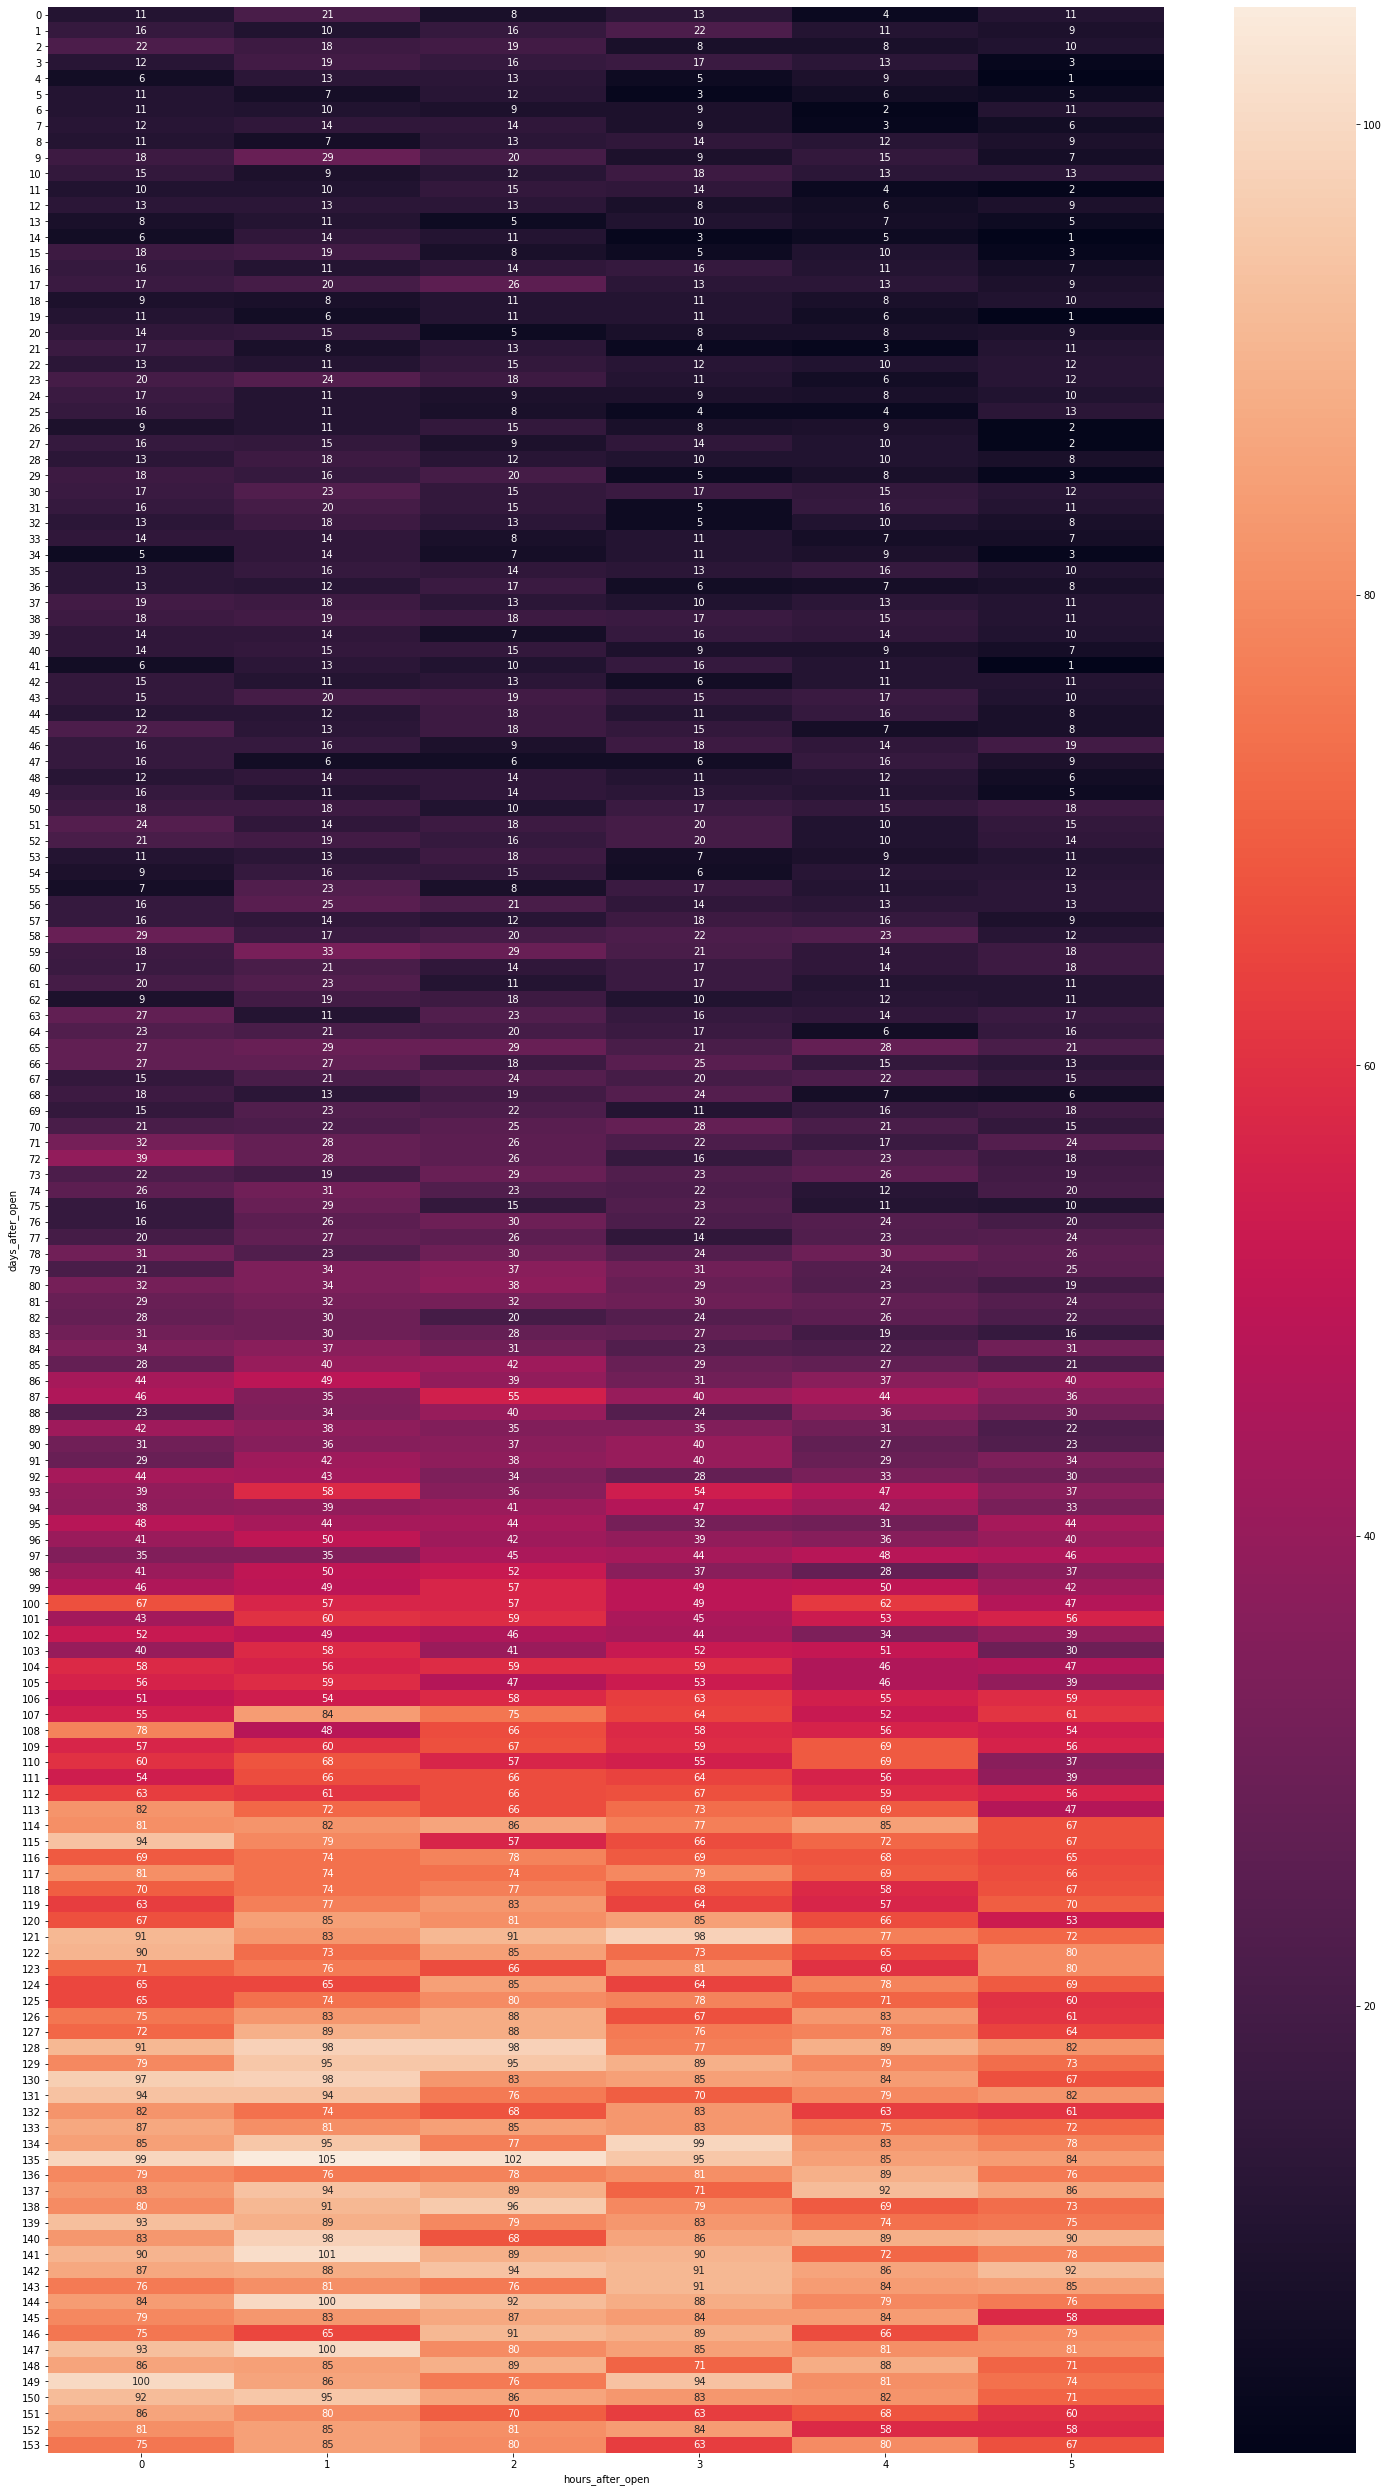

In [12]:
heatmap = pd.pivot_table(data = group_data2 , values="quantity",
                         index='days_after_open',columns='hours_after_open',aggfunc="sum",fill_value=0)
plt.figure(figsize=(25,45))
sns.heatmap(heatmap,annot=True,fmt="g")

here I use a heat map for the visualization of the volume of sales in a coffee shop. here x-axis is the time from since the store is open and the y-axis is the day since the store is open, each box contains the value of the number of coffee being sold for a particular day and time. the color gets darker when the sales volume is less and it gets lighter when the sale value is more. For the first 50 days average of 20 coffee being sold every hour, it's increased to 30 units per day after 80 days and reached 100 units per day after few days, but after 145 days the sales again start decreasing.

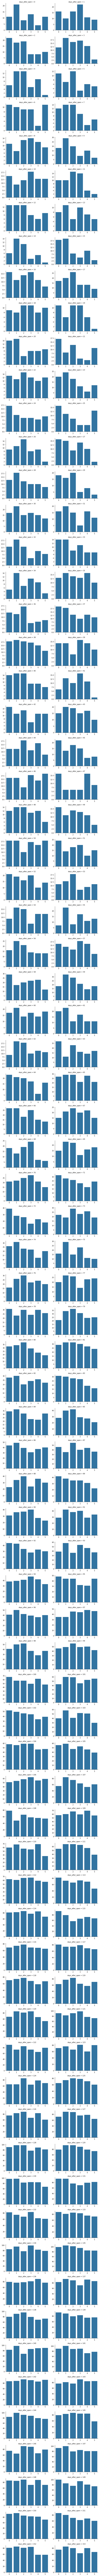

In [13]:
g = sns.FacetGrid(group_data2, col='days_after_open', sharex=False, sharey=False, col_wrap=2, height=3, aspect=1.5)
k = g.map_dataframe(sns.barplot, x='hours_after_open', y='quantity')

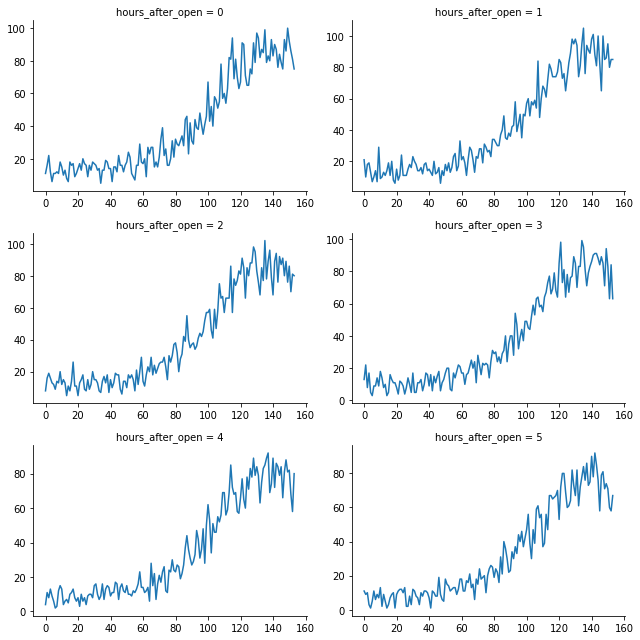

In [14]:
g = sns.FacetGrid(group_data2, col='hours_after_open', sharex=False, sharey=False, col_wrap=2, height=3, aspect=1.5)
g.map_dataframe(sns.lineplot, x='days_after_open', y='quantity')

**Conclusion**: After analyzing the above plots and table I can say that yes time is a factor on which the sales of the store depending, in initial days the sales are very less, the reason behind this may be most of the people don't know about it or the product served by the store is not attractive to the customer. After few days the sales start increasing, there are various reasons behind it, maybe the store get the repetitive customer more frequently or they introduce some good variety in the menu.

**Further work** : so to get more depth about the data I want to suggest my fellow team member analyze the impact of the type of drink and area from which the customer is coming on the number of units being a sale. Because there may be demand for some particular drink only in the cafe due to which more and more customer are ordering it, and maybe the from the particular area more of the customer is coming to the coffee. by this, we can know how to improve the business further and next there is the sudden drop in the sales throughout the period, one thing I know that in late hours fewer people were coming but after analyzing other factors maybe we get more idea about this.  

In [21]:
%%shell
jupyter nbconvert --to html /content/Café_Insomnia(3).ipynb

/bin/bash: -c: line 0: syntax error near unexpected token `('
/bin/bash: -c: line 0: `jupyter nbconvert --to html /content/Café_Insomnia(3).ipynb'


CalledProcessError: ignored